In [18]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# data load
df = pd.read_csv('./dataset/global_tech_salary.txt', delimiter=',')

In [4]:
# 데이터 탐색
print(df.head())
print(df.info())
print(df.describe())

   work_year experience_level employment_type                  job_title  \
0       2023               MI              FT               Data Analyst   
1       2023               MI              FT               Data Analyst   
2       2024               MI              FT  Machine Learning Engineer   
3       2024               SE              FT             Data Scientist   
4       2023               MI              FT          Research Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  165000             USD         165000                 AU             0   
1   70000             USD          70000                 US           100   
2   85000             EUR          94444                 IE           100   
3   92700             USD          92700                 US             0   
4  150000             USD         150000                 US             0   

  company_location company_size  
0               AU            M  
1           

In [5]:
# 중복값 확인
print(f"중복값 개수: {df.duplicated().sum()}")

중복값 개수: 1144


In [6]:
# 중복값 제거
df = df.drop_duplicates()

# 결측치 제거
df = df.dropna()

In [10]:
# 1. 연봉을 범주형 데이터로 변환
# 예: 구간 설정 (낮음: 0, 중간: 1, 높음: 2)
salary_bins = [0, 50000, 100000, np.inf]  # 구간 설정
salary_labels = [0, 1, 2]  # 낮음(0), 중간(1), 높음(2)
df['Salary_Category'] = pd.cut(df['salary_in_usd'], bins=salary_bins, labels=salary_labels)

In [9]:
df = pd.get_dummies(df, drop_first=True)  # 범주형 변수 One-Hot Encoding

In [12]:
# 원본 데이터에서 'salary_currency', 'salary 제거하고 새로운 데이터 사용
df = df.drop(columns=['salary'])

In [13]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop(columns=['salary_in_usd', 'Salary_Category'])  # 연봉 관련 열 제외
y = df['Salary_Category'].astype(int)  # 범주형 변수 정수형으로 변환

## random forest

In [14]:
# 3. 데이터 분리 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 4. 랜덤 포레스트 분류 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# 5. 예측
y_pred = rf_model.predict(X_test)

In [19]:
# 6. 모델 평가
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 30   2   1]
 [  3 173   1]
 [  0   6 556]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.96      0.98      0.97       177
           2       1.00      0.99      0.99       562

    accuracy                           0.98       772
   macro avg       0.95      0.96      0.96       772
weighted avg       0.98      0.98      0.98       772



In [20]:
# 7. 변수 중요도 시각화
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

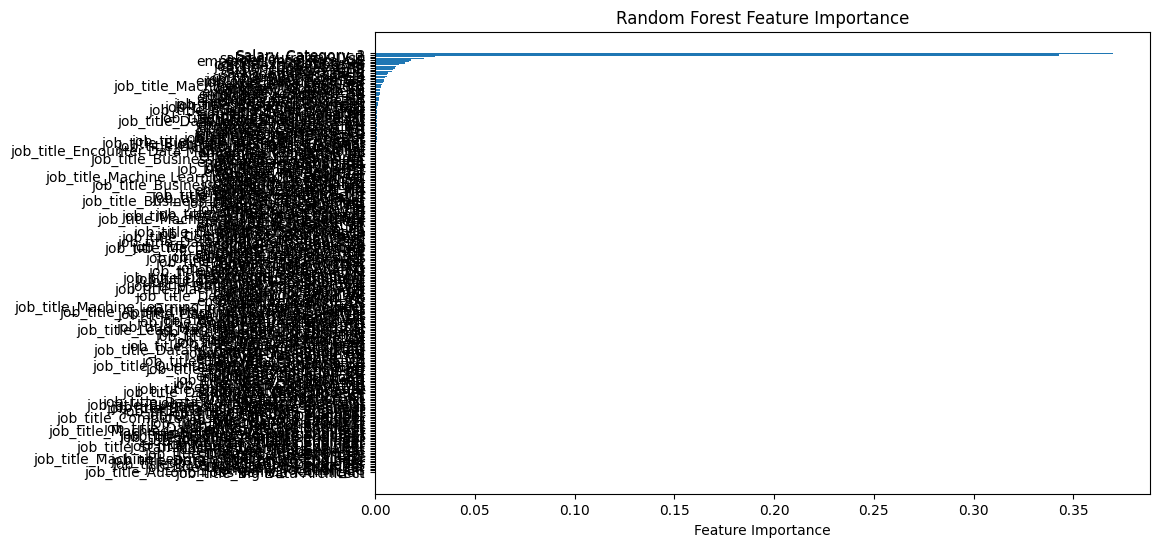

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()